# The Sparks Foundation Internship

## Task 6 - Prediction using Decision Tree Algorithm

### Done By Omar Mohamed Lotfy





## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

## Reading Iris Data and Visualizing it

In [2]:
#putting Iris.csv in dataframe andsetting the first column as index column
df = pd.read_csv("Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


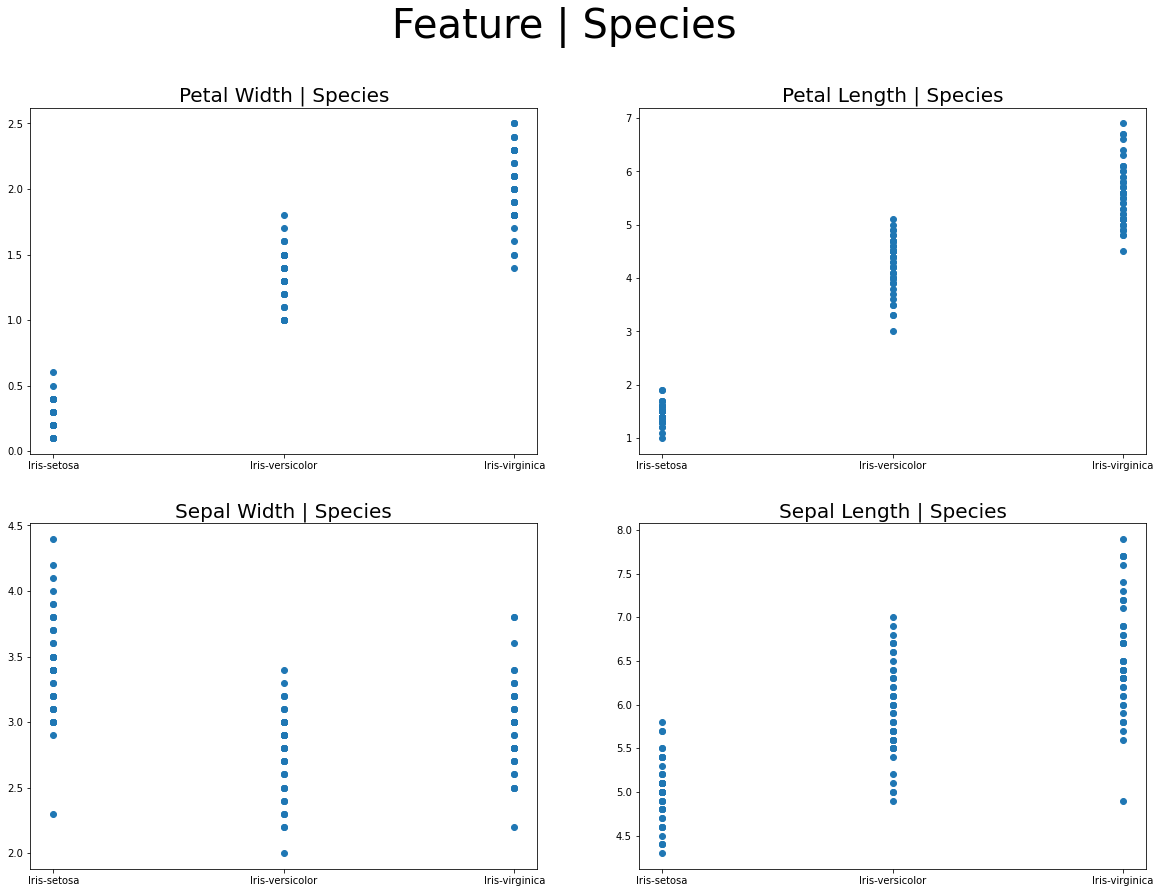

In [4]:
# plotting Data using column charts
# With features on y-axis and species on x-axis
fig, axs = plt.subplots(2, 2 ,figsize = (20 , 14) ) 
fig.suptitle('Feature | Species ',fontsize = 40)


axs[0, 0].scatter(df['Species'], df['PetalWidthCm'])
axs[0, 0].set_title('Petal Width | Species',fontsize = 20)


axs[0, 1].scatter(df['Species'], df['PetalLengthCm'])
axs[0, 1].set_title('Petal Length | Species',fontsize = 20)


axs[1, 0].scatter(df['Species'], df['SepalWidthCm'])
axs[1, 0].set_title('Sepal Width | Species',fontsize = 20)


axs[1, 1].scatter(df['Species'], df['SepalLengthCm'])
axs[1, 1].set_title('Sepal Length | Species',fontsize = 20)

plt.show()

## Splittig Data

In [5]:
# Putting values of features in X and the label in Y
X=df.iloc[:,:-1].values
Y=df['Species']

In [6]:
# Splitting Data into 20% Testing Data using stratfy 
#to make sure species occur with same percentages in testing and training data.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=3,stratify=Y)
print(x_train.shape,x_test.shape)

(120, 4) (30, 4)


## Cross Validation

In [7]:
# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (classifier) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
Maxdepth_List = list(range(1,11))
score_tree = []
for m in Maxdepth_List:
    classifier = DecisionTreeClassifier(criterion="entropy",max_depth=m,random_state=3)
    scores_tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')
    score_tree.append(scores_tree.mean())
print(score_tree)
best_depth = Maxdepth_List[score_tree.index(max(score_tree))]
print('\nThe optimal number of levels is %d.' % best_depth)

[0.6666666666666667, 0.9666666666666666, 0.9583333333333333, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332]

The optimal number of levels is 4.


## Building  Model

In [8]:
#Building DT Model using optimal depth 
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=3)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

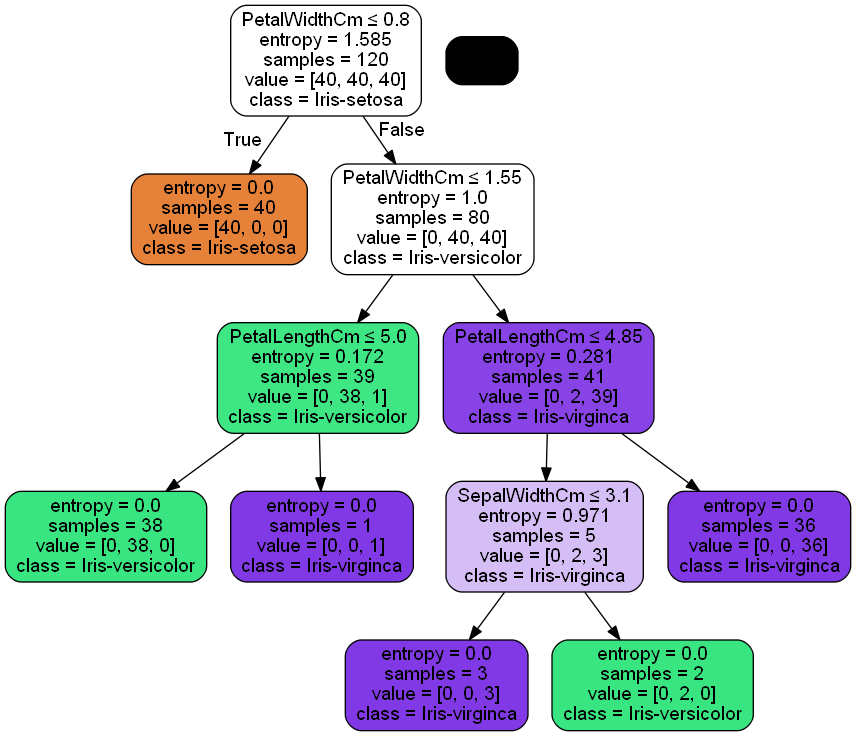

In [9]:
# Drawing Decision Tree
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa','Iris-versicolor','Iris-virginca']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=classes)
tree = pydotplus.graph_from_dot_data(dot_data.getvalue())  
tree.write_png('tree.png')
Image(tree.create_png())

In [10]:
# Evaluating the Model on testing data
y_pred = classifier.predict(x_test)

In [11]:
# Calculating The Accuracy Score for our model
accuracy_tree = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy_tree)

Accuracy: 0.90
